# Keywords analysis
## Author - gromdimon
## 16.06.2023

## Preparation
### Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

### Locating Data

In [4]:
import os
for dirname, _, filenames in os.walk('long_covid2'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

long_covid2/tweets_merged.rds
long_covid2/records_and_brand24_clean.xlsx
long_covid2/records_and_brand24_clean.csv
long_covid2/records_and_brand24_full.xlsx
long_covid2/articles_LC_all.xlsx
long_covid2/twitter/long2/data_1616709227774443520.json
long_covid2/twitter/long2/users_1616027459270643712.json
long_covid2/twitter/long2/users_1616007985389510662.json
long_covid2/twitter/long2/users_1616398959567683585.json
long_covid2/twitter/long2/data_1616045415715028997.json
long_covid2/twitter/long2/users_1616077278768926721.json
long_covid2/twitter/long2/users_1616448429126832128.json
long_covid2/twitter/long2/users_1616881630496395265.json
long_covid2/twitter/long2/users_1616131940335390720.json
long_covid2/twitter/long2/users_1616289594927976448.json
long_covid2/twitter/long2/data_1616770094427684864.json
long_covid2/twitter/long2/users_1616185469460430859.json
long_covid2/twitter/long2/users_1616094183034425344.json
long_covid2/twitter/long2/users_1616524108329541633.json
long_covid2/twi

In [5]:
# Stopwords
with open('stopwords-de.txt', 'r') as f:
    stopwords = f.read().splitlines()

if len(stopwords) != len(set(stopwords)):
    print('There are duplicates in the stopwords list')
else:
    print('There are no duplicates in the stopwords list')

print('Number of stopwords: ', len(stopwords))

stopwords = [word.lower() for word in stopwords]

There are no duplicates in the stopwords list
Number of stopwords:  620


### Load data

In [6]:
df_articles_all = pd.read_excel('long_covid2/articles_LC_all.xlsx')
df_record_brand_clean = pd.read_excel('long_covid2/records_and_brand24_clean.xlsx')
df_record_brand_full = pd.read_excel('long_covid2/records_and_brand24_full.xlsx')

print('Shape of df_articles_all: ', df_articles_all.shape)
print('Shape of df_record_brand_clean: ', df_record_brand_clean.shape)
print('Shape of df_record_brand_full: ', df_record_brand_full.shape)
print('Heads of df_articles_all: ')
display(df_articles_all.head(3))
print('Heads of df_record_brand_clean: ')
display(df_record_brand_clean.head(3))
print('Heads of df_record_brand_full: ')
display(df_record_brand_full.head(3))

Shape of df_articles_all:  (36413, 9)
Shape of df_record_brand_clean:  (21397, 10)
Shape of df_record_brand_full:  (47487, 10)
Heads of df_articles_all: 


,Unique ID (URI),URL,Publish date,Publish time,Source URI,Source title,Language,Article title,Article body
0,6750622589,https://idw-online.de/de/event69687,2021-09-30,22:38:00,idw-online.de,Informationdienst Wissenschaft e.V. - idw,deu,Deutscher Schmerzkongress 2021: Wissen schaffe...,+++ Chronische Kopfschmerzen bei Kindern +++ S...
1,6750622704,https://idw-online.de/de/event69578,2021-09-30,22:33:00,idw-online.de,Informationdienst Wissenschaft e.V. - idw,deu,Update Schutzimpfungen und COVID-19,Aufgrund anhaltender hoher Nachfrage bieten wi...
2,6750564304,https://www.n-tv.de/panorama/23-18-Maskenverwe...,2021-09-30,21:22:00,n-tv.de,N-tv,deu,Coronavirus-Liveticker: +++ 23:18 Maskenverwei...,Ein Maskenverweigerer hat in Dortmund einen Ki...


Heads of df_record_brand_clean: 


,id,title,content,source,domain,category,sentiment,publish_time,url,language
0,69470691892,Entlarvender Bericht: Meldung zu aufwändig – Ä...,Entlarvender Bericht: Meldung zu aufwändig – Ä...,https://diesituation.wordpress.com/2023/03/30/...,diesituation.wordpress.com,Blogs,0.0,2023-03-30 05:32:00,NaN,NaN
1,69468248231,Wann kommen Medikamente gegen Long Covid?,"Aber was ist mit Therapien für Menschen, die n...",https://www.shz.de/lebenswelten/gesundheit-fit...,shz.de,News,0.0,2023-03-30 01:44:00,NaN,NaN
2,69468902109,Spiel auf Zeit: Wann kommen Medikamente gegen ...,"Aber was ist mit Therapien für Menschen, die n...",https://www.ksta.de/ratgeber/dpa-ratgeber/wann...,ksta.de,News,0.0,2023-03-30 01:40:00,NaN,NaN


Heads of df_record_brand_full: 


,id,title,content,source,domain,category,sentiment,publish_time,url,language
0,69471821207,NaN,NaN,Tweet-ID: 1641434640073228289,twitter.com,Twitter,0.0,2023-03-30 06:38:00,NaN,NaN
1,69471461501,NaN,NaN,Tweet-ID: 1641434159108489219,twitter.com,Twitter,0.0,2023-03-30 06:36:00,NaN,NaN
2,69471821215,NaN,NaN,Tweet-ID: 1641433328711766017,twitter.com,Twitter,0.0,2023-03-30 06:32:00,NaN,NaN


## Keywords investigation
### Small preprocessing

In [7]:
# Great job! Could you try to look how mecfs, cfs, fatugue and spaetfolgen are changing in time. I.e. by years 202-3 in terms of relative frequency (% of given word in all words and in absolute values)?
words = ['mecfs', 'cfs', 'fatigue', 'spätfolgen']

### df_record_brand_clean

In [8]:
# Create a new column with the year
df_record_brand_clean['year'] = df_record_brand_clean['publish_time'].dt.year

# Create a new column with the month
df_record_brand_clean['month'] = df_record_brand_clean['publish_time'].dt.month

# Create a new column with the day
df_record_brand_clean['day'] = df_record_brand_clean['publish_time'].dt.day

# Create a new column number_of_articles per year
df_record_brand_clean['number_of_articles'] = df_record_brand_clean.groupby('year')['year'].transform('count')

# Create a new column number_of_articles per month
df_record_brand_clean['number_of_articles_month'] = df_record_brand_clean.groupby('month')['month'].transform('count')

In [9]:
# Keywords in the text body
for word in words:
    df_record_brand_clean[word] = df_record_brand_clean['content'].str.contains(word, case=False)

# Keywords in the title
for word in words:
    df_record_brand_clean[word + '_title'] = df_record_brand_clean['title'].str.contains(word, case=False)


In [10]:
# Present the results
for word in words:
    print('Number of articles containing the word', word, 'in the text body: ', df_record_brand_clean[word].sum())
    print('Number of articles containing the word', word, 'in the title: ', df_record_brand_clean[word + '_title'].sum())


Number of articles containing the word mecfs in the text body:  3
Number of articles containing the word mecfs in the title:  2
Number of articles containing the word cfs in the text body:  202
Number of articles containing the word cfs in the title:  105
Number of articles containing the word fatigue in the text body:  198
Number of articles containing the word fatigue in the title:  84
Number of articles containing the word spätfolgen in the text body:  489
Number of articles containing the word spätfolgen in the title:  230


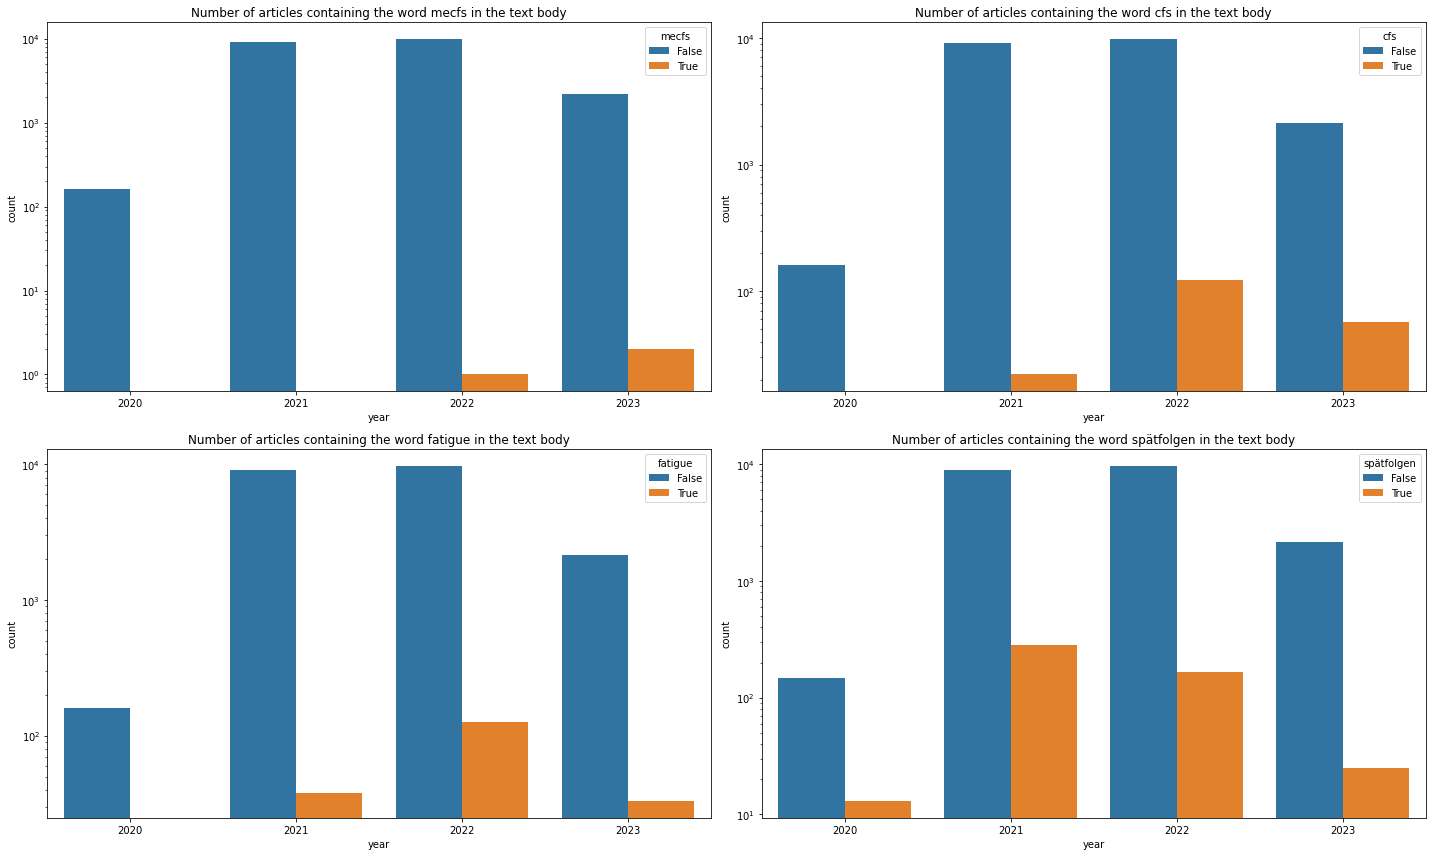

In [11]:
# Plot the results
# for word in words:
#     plt.figure(figsize=(10, 6))
#     sns.countplot(x='year', data=df_record_brand_clean, hue=word)
#     plt.title('Number of articles containing the word ' + word + ' in the text body')
#     plt.show()
fig, axs = plt.subplots(nrows=int(len(words)/2), ncols=2, figsize=(20, 3*len(words)))

for i, word in enumerate(words):
    sns.countplot(x='year', data=df_record_brand_clean, hue=word, ax=axs[i//2, i%2])
    axs[i//2, i%2].set_title('Number of articles containing the word ' + word + ' in the text body')
    axs[i//2, i%2].set(yscale="log")

plt.tight_layout()
plt.show()
    

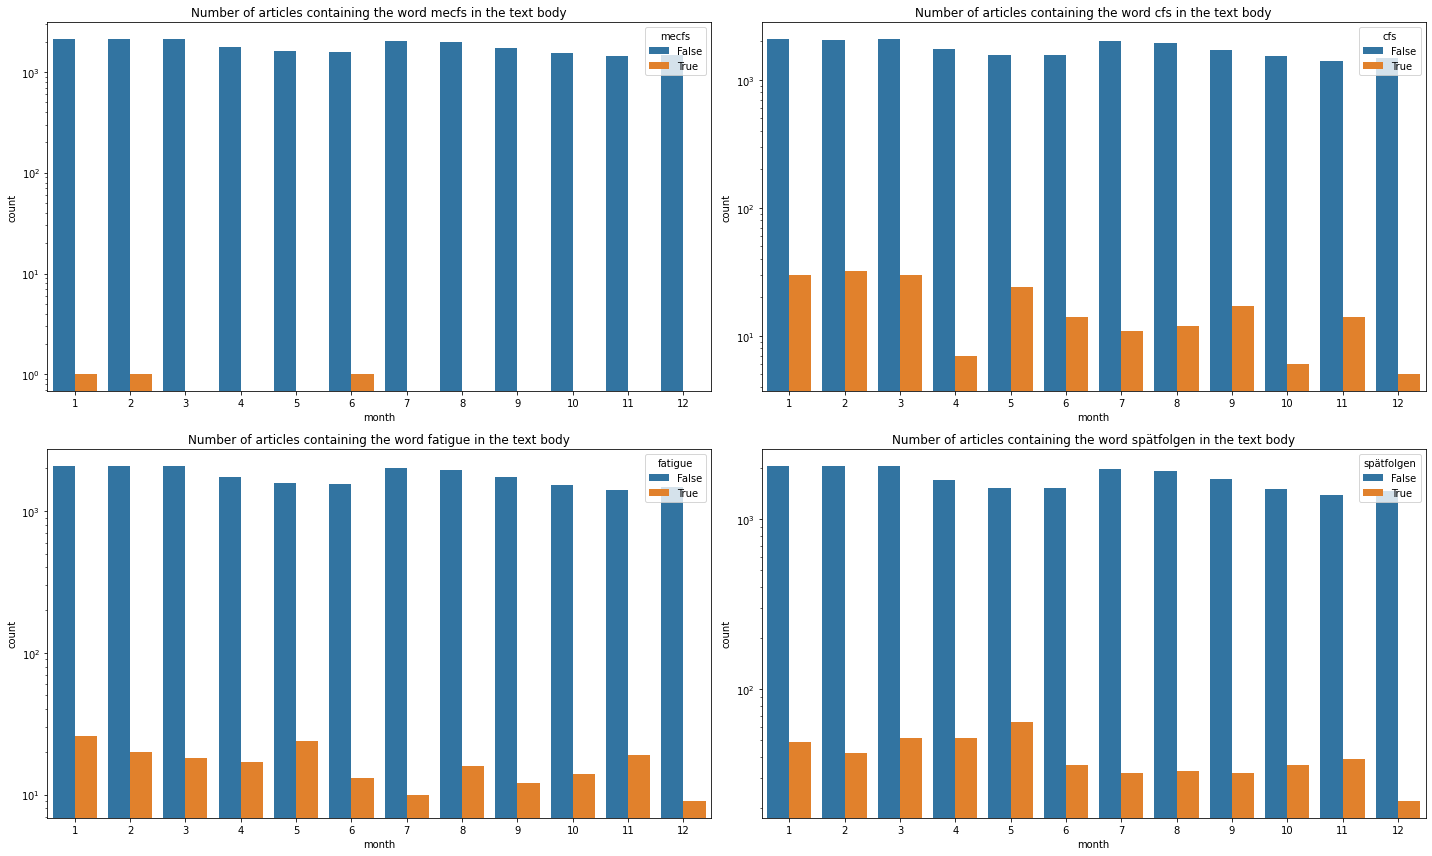

In [12]:
# Plot the results to month
fig, axs = plt.subplots(nrows=int(len(words)/2), ncols=2, figsize=(20, 3*len(words)))

for i, word in enumerate(words):
    sns.countplot(x='month', data=df_record_brand_clean, hue=word, ax=axs[i//2, i%2])
    axs[i//2, i%2].set_title('Number of articles containing the word ' + word + ' in the text body')
    axs[i//2, i%2].set(yscale="log")

plt.tight_layout()
plt.show()

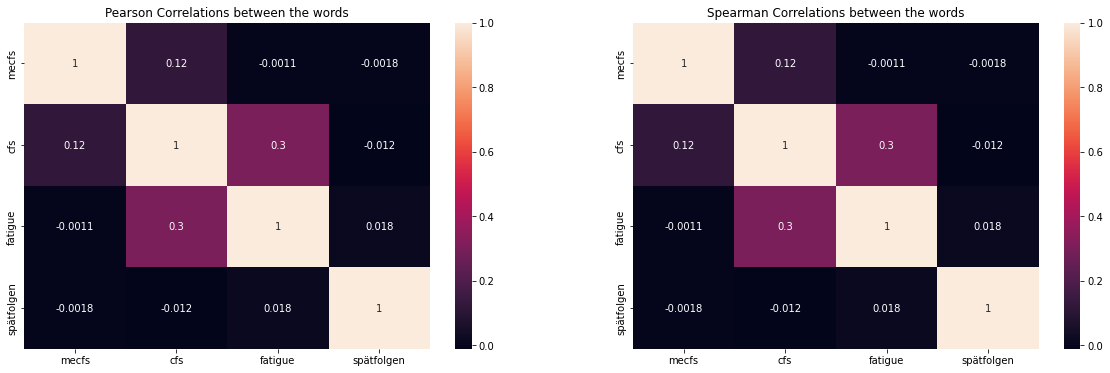

In [16]:
fig, axs = plt.subplots(ncols=2, figsize=(20, 6))

# Plot the Pearson correlation matrix
sns.heatmap(df_record_brand_clean[words].corr(), annot=True, ax=axs[0])
axs[0].set_title('Pearson Correlations between the words')

# Plot the Spearman correlation matrix
sns.heatmap(df_record_brand_clean[words].corr(method='spearman'), annot=True, ax=axs[1])
axs[1].set_title('Spearman Correlations between the words')

plt.show()

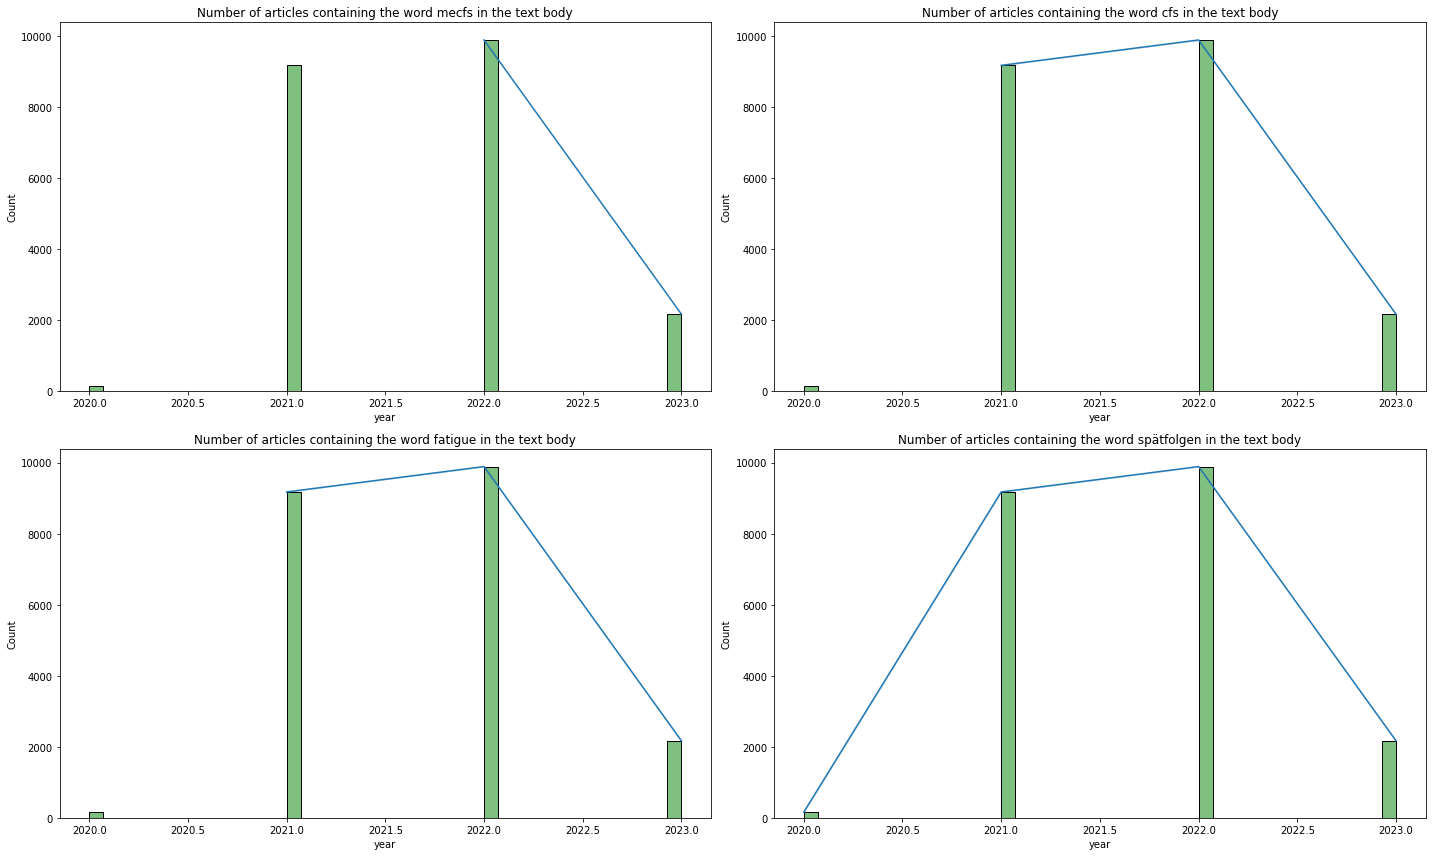

In [14]:
# Plot the results in comparison to the number of articles per year
fig, axs = plt.subplots(nrows=int(len(words)/2), ncols=2, figsize=(20, 3*len(words)))

for i, word in enumerate(words):
    sns.histplot(x='year', data=df_record_brand_clean, ax=axs[i//2, i%2], color='green', alpha=0.5)
    sns.lineplot(x='year', y='number_of_articles', data=df_record_brand_clean[df_record_brand_clean[word]>0], ax=axs[i//2, i%2])
    # sns.lineplot(x='year', y='number_of_articles', data=df_record_brand_clean, ax=axs[i//2, i%2])
    axs[i//2, i%2].set_title('Number of articles containing the word ' + word + ' in the text body')

plt.tight_layout()
plt.show()

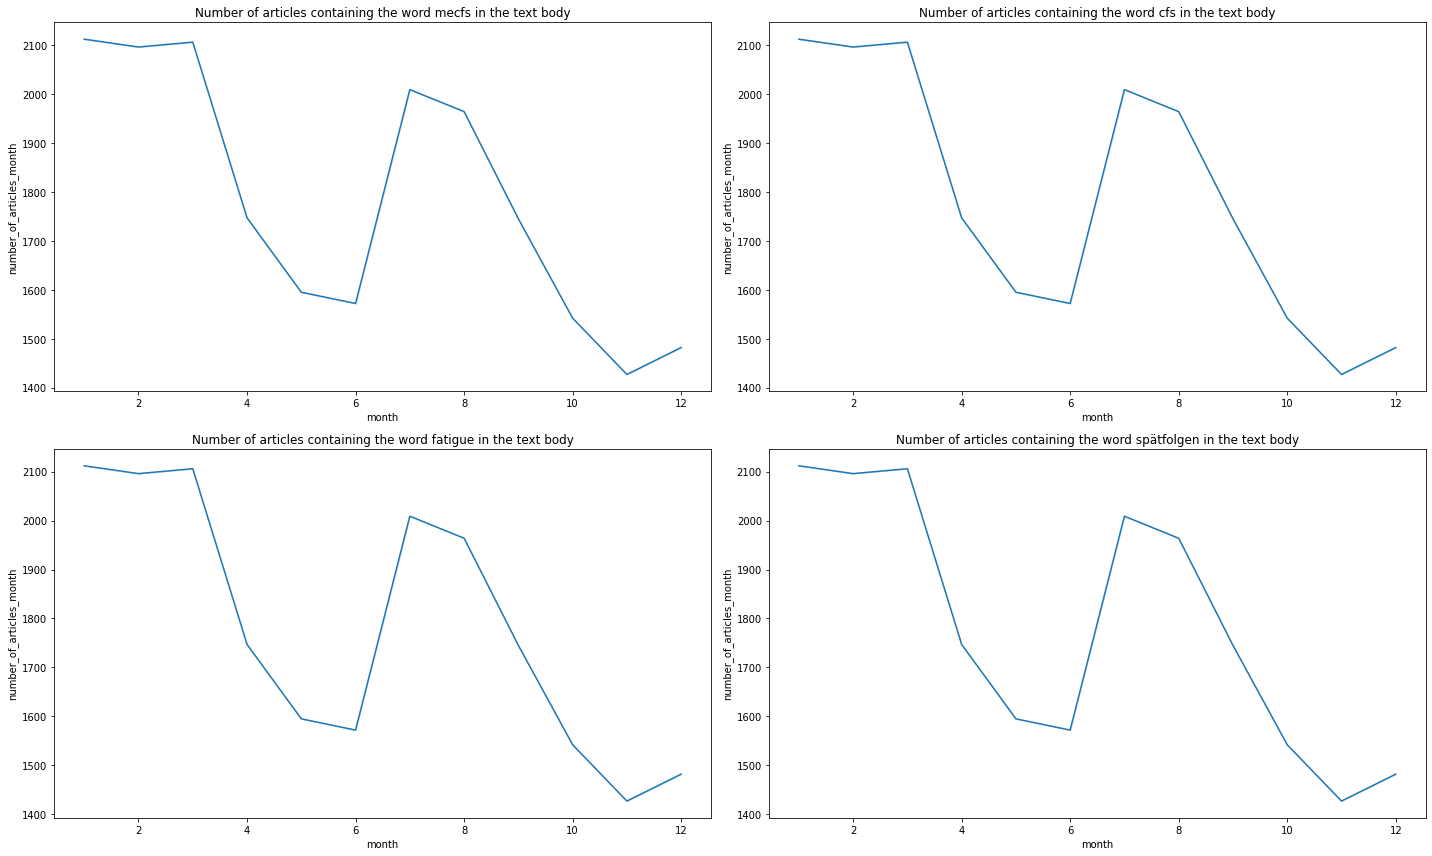

In [15]:
# Plot the results in comparison to the number of articles per month
fig, axs = plt.subplots(nrows=int(len(words)/2), ncols=2, figsize=(20, 3*len(words)))

for i, word in enumerate(words):
    # sns.histplot(x='year', data=df_record_brand_clean, ax=axs[i//2, i%2], color='green', alpha=0.5)
    # sns.lineplot(x='year', y='number_of_articles_month', data=df_record_brand_clean[df_record_brand_clean[word]>0], ax=axs[i//2, i%2])
    sns.lineplot(x='month', y='number_of_articles_month', data=df_record_brand_clean, ax=axs[i//2, i%2])
    axs[i//2, i%2].set_title('Number of articles containing the word ' + word + ' in the text body')

plt.tight_layout()
plt.show()

## Results and conclusions
